# Separation of Previous Code into Environment and Agent Codes

done


<IPython.core.display.Javascript object>


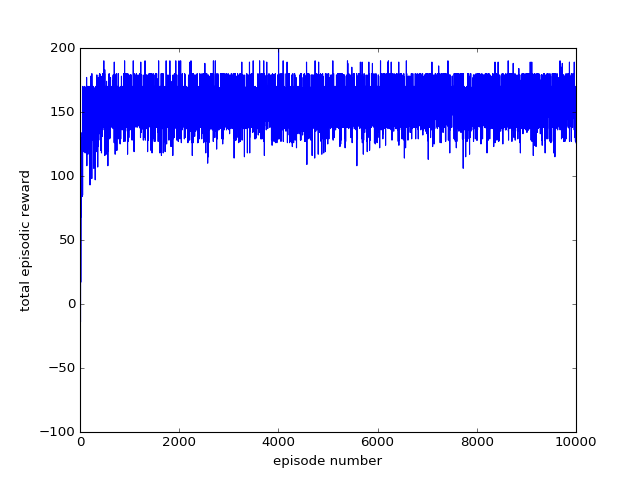

reward model
[[ 0. 10.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
Q function for up action
[[18.07646188 22.432147   17.89077826 12.2067402   0.34059035]
 [17.51442352 20.07285169 17.74847439 13.68395395  0.61572473]
 [15.25675242 17.84537798 15.46638455 13.37576502  1.18901023]
 [14.31212164 15.73616959 14.26588443 12.1428289   1.63077478]
 [12.76908802 13.65360453 12.70018228 11.25284299  2.06580051]]
Q function for down action
[[16.20217255 22.50836787 16.05562182 10.97778662  0.45001421]
 [14.45816155 16.27726372 14.82957435 12.64414785 11.01939586]
 [12.88359697 14.37802416 12.780066   11.28227716  2.94858119]
 [11.56619401 12.80124808 11.63919578  9.82065302  2.25817408]
 [11.56855718 12.51077876 11.37667259  7.98427203  1.15016167]]
Q function for left action
[[17.71495632 22.43123028 20.11336792 15.23087299  0.03787751]
 [16.31301698 16.06288588 17.54094393 15.85510477  0.64059788]
 [14.32291598 14.34122816 15.88460

<IPython.core.display.Javascript object>


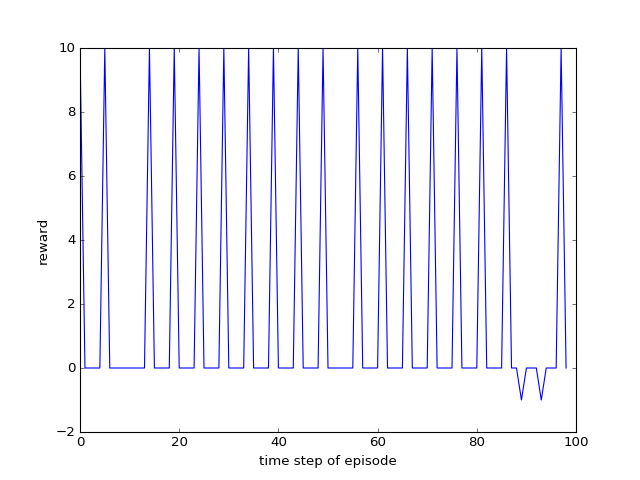

<IPython.core.display.Javascript object>


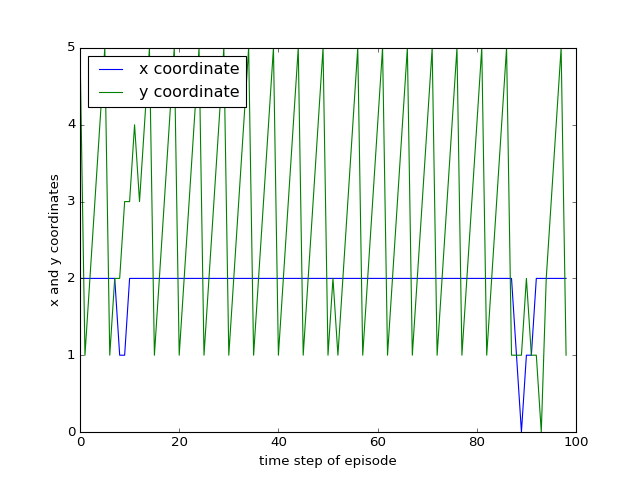

Exploit policy of agent, where: 1 is up, 2 is down, 3 is left and 4 is right
[[4 2 3 4 2]
 [4 1 1 3 2]
 [4 1 3 3 3]
 [1 1 1 3 3]
 [1 1 1 1 3]]


In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent.qLearning(world,'')#'render' with quotes to show environment
agent.work()

## Before Using PyTorch
The neural network model uses array-style inputs and outputs, so I have to change my Q function from it's original form in Q_Learning_Agent to an arrayed form in Q_Learning_Agent_Arrayed.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent_Arrayed

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent_Arrayed.qLearning(world,'')#'render' with quotes to show environment
agent.work()

# Getting Used to PyTorch
The below code seems to work, now making it into a class file. Code from https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [1]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1, 49, 100, 4

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss()

learning_rate = 1e-4
for t in range(1000):
    y_pred = model(x)#prediction step is called forward pass

    loss = loss_fn(y_pred, y)#loss calculation for feedback
    print(t, loss.item())

    loss.backward()#gradient of loss step is called backward pass

    with torch.no_grad():# Update the weights using gradient descent.
        for param in model.parameters():
            param -= learning_rate * param.grad

0 0.6796625256538391
1 0.6774558424949646
2 0.6730555891990662
3 0.6664873957633972
4 0.6577898859977722
5 0.6471132636070251
6 0.6344960331916809
7 0.6199628710746765
8 0.6035987138748169
9 0.5854993462562561
10 0.565771222114563
11 0.5445311069488525
12 0.521905779838562
13 0.4980311989784241
14 0.47305214405059814
15 0.44712182879447937
16 0.4204009771347046
17 0.3930576741695404
18 0.365266352891922
19 0.33720725774765015
20 0.30906572937965393
21 0.2810314893722534
22 0.2532976269721985
23 0.2260599434375763
24 0.19951589405536652
25 0.17386333644390106
26 0.14929969608783722
27 0.12602055072784424
28 0.10421811789274216
29 0.0840800553560257
30 0.06578771024942398
31 0.049514289945364
32 0.0354524590075016
33 0.02374371513724327
34 0.014483696781098843
35 0.00779327005147934
36 0.0037751453928649426
37 0.002511728322133422
38 0.00406284723430872
39 0.00846363790333271
40 0.01572239026427269
41 0.02581881172955036
42 0.038702115416526794
43 0.054289888590574265
44 0.07246681302785

# Implementation of Deep Q-Learning Agent in Gridworld Environment
## Steps for implementation
* Weights initialized 
### Looping
* NN "forward pass" (prediction of Q function) is sent to Agent
* Agent makes decision and observes reward. The reward is sent back to NN along with the currently used Q function
* Send Current Q function estimate for the agent's exploiting policy action (regardless if agent performs action) and newly observed reward to NN class file
* Agent reperforms "forward pass" (prediction of Q function) to facilitate the calculation of loss with respect to the received Q function estimate for agent's exploit action and the observed reward
* Repeat but without weight initialization

## Progress
### Done
* Weights already randomly initialized using above code
### Need to Do
* Forward pass sent to agent
 * Need to include NN in agent's __init__ to enable receiving forward pass output for actions related to agent's state
 * Need to include agent in NN's __init__ to receive state, reward and to receive Q function estimate (y_pred) from agent
#### Progress Notes
Example code, upon which my implementation is based, randomly initizlizes input and output to the network, but not necessarily the weights? From reviewing the tutorial, it seems that the weights are randomly initialized as part of the establishment of a model network. I'll operate on that assumption for now.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent_nn#, reluNetworkClass

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent_nn.qLearning(world,'','')#'render' with quotes to show environment
agent.work()